In [1]:
import pandas as pd


df = pd.read_json("./data/reports.json")
df.head()

,Description,StartLine,EndLine,StartColumn,EndColumn,Match,Secret,File,SymlinkFile,Commit,Entropy,Author,Email,Date,Message,Tags,RuleID,Fingerprint
0,"Detected a Generic API Key, potentially exposi...",33,33,30,57,"Key"": ""cm9tIGlzIHRoZSBraW5n""",cm9tIGlzIHRoZSBraW5n,helm_tests/other/test_git_ssh_key_secret.py,,f81abd6145d20305148e0a91e8a6ff5026927b70,4.221928,rom sharon,33751805+romsharon98@users.noreply.github.com,2024-06-19 06:00:41+00:00,add git-sync-ssh secret template (#39936),[],generic-api-key,f81abd6145d20305148e0a91e8a6ff5026927b70:helm_...
1,"Detected a Generic API Key, potentially exposi...",82,82,10,38,"PASSWORD = ""5FHq4fSZ85kK6g0n""",5FHq4fSZ85kK6g0n,tests/system/providers/google/cloud/bigquery/e...,,4ae85d754e9f8a65d461e86eb6111d3b9974a065,3.875000,max,42827971+moiseenkov@users.noreply.github.com,2024-04-23 10:47:42+00:00,Bugfix BigQueryToMsSqlOperator (#39171),[],generic-api-key,4ae85d754e9f8a65d461e86eb6111d3b9974a065:tests...
2,"Detected a Generic API Key, potentially exposi...",151,151,12,40,"PASSWORD = ""JoxHlwrPzwch0gz9""",JoxHlwrPzwch0gz9,tests/system/providers/google/cloud/cloud_sql/...,,1757704d8f7c7a335cdf8f90ccb12b4d8e6f9d9a,3.750000,max,42827971+moiseenkov@users.noreply.github.com,2024-04-11 08:56:34+00:00,Enhancement for SSL-support in CloudSQLExecute...,[],generic-api-key,1757704d8f7c7a335cdf8f90ccb12b4d8e6f9d9a:tests...
3,"Detected a Generic API Key, potentially exposi...",143,143,12,40,"PASSWORD = ""JoxHlwrPzwch0gz9""",JoxHlwrPzwch0gz9,tests/system/providers/google/cloud/cloud_sql/...,,1757704d8f7c7a335cdf8f90ccb12b4d8e6f9d9a,3.750000,max,42827971+moiseenkov@users.noreply.github.com,2024-04-11 08:56:34+00:00,Enhancement for SSL-support in CloudSQLExecute...,[],generic-api-key,1757704d8f7c7a335cdf8f90ccb12b4d8e6f9d9a:tests...
4,"Discovered a Slack Webhook, which could lead t...",132,132,20,88,hooks.slack.com/services/T00000000/B00000000/X...,hooks.slack.com/services/T00000000/B00000000/X...,tests/providers/slack/hooks/test_slack_webhook.py,,4358511fce2eab6d3f97edb1c95d09f4f5a49376,3.129555,Andrey Anshin,Andrey.Anshin@taragol.is,2024-04-07 09:23:27+00:00,"Add `AirflowInternalRuntimeError` for raise ""n...",[],slack-webhook-url,4358511fce2eab6d3f97edb1c95d09f4f5a49376:tests...


In [16]:
from math import pi


from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from bokeh.io import export_png


data = df[["RuleID"]].value_counts().reset_index().rename(columns={0: "count"}).sort_values(by="count", ascending=False).head(10)
data['angle'] = data['count']/data['count'].sum() * 2*pi
data['color'] = Category20c[data.shape[0]]
p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@RuleID: @count", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='RuleID', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None


export_png(p, filename="pie_chart.png")

'/Users/devseunggwan/projects/dev/scratchs/data-processing/2024/202407/20240716/pie_chart.png'

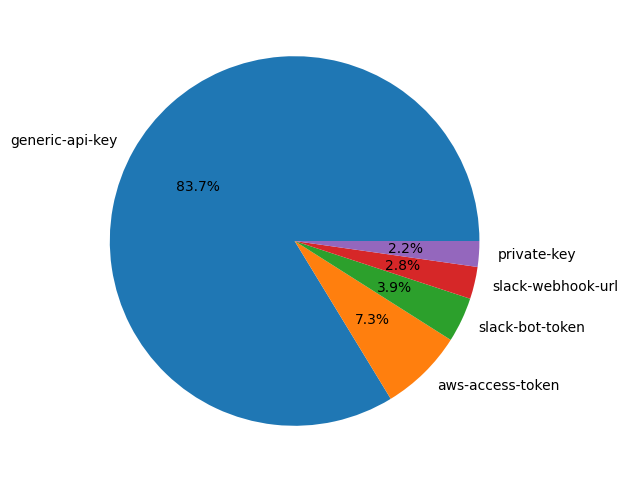

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.pie(x=data["count"], labels=data["RuleID"], autopct="%1.1f%%")

plt.show()

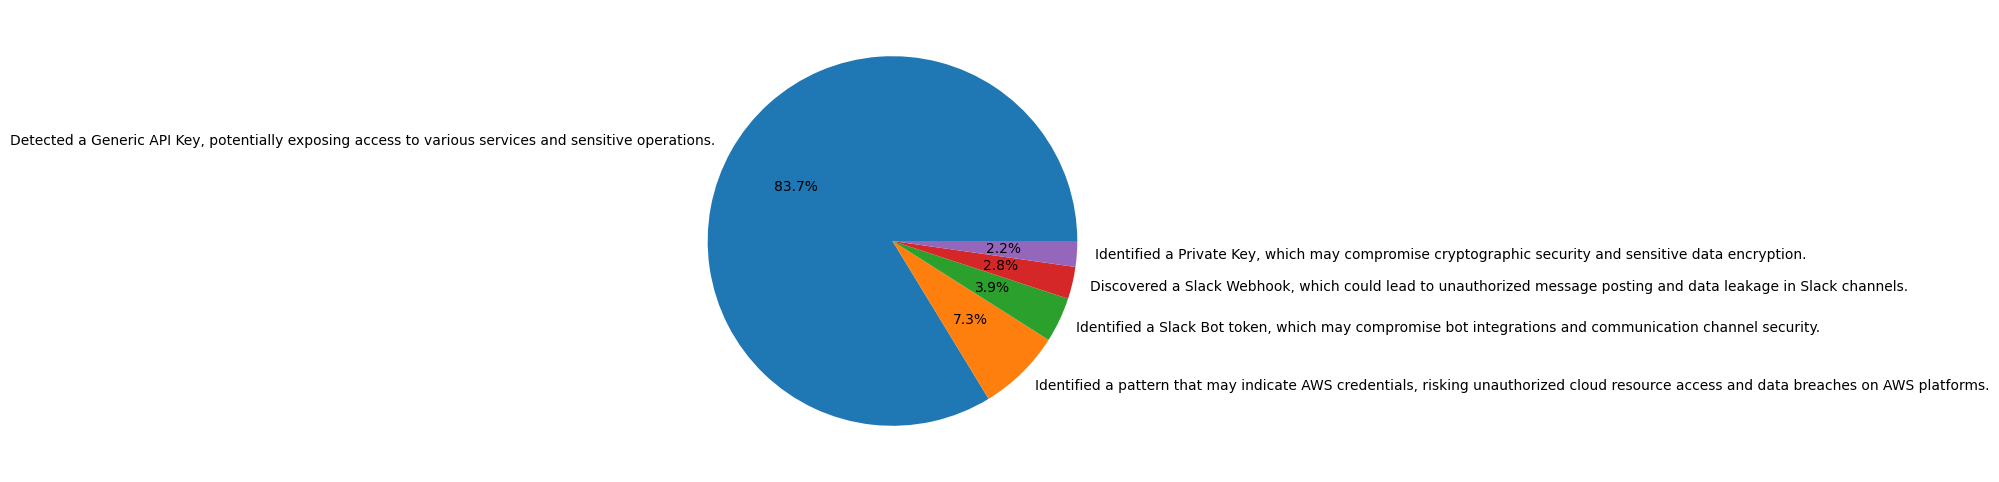

In [14]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
data = df[["Description"]].value_counts().reset_index().rename(columns={0: "count"}).sort_values(by="count", ascending=False).head(10)

plt.pie(x=data["count"], labels=data["Description"], autopct="%1.1f%%")
plt.show()


In [11]:
df["RuleID"].value_counts()

RuleID
generic-api-key      149
aws-access-token      13
slack-bot-token        7
slack-webhook-url      5
private-key            4
Name: count, dtype: int64

In [25]:
df.loc[df["File"].str.contains("test")]["RuleID"].value_counts() 

RuleID
generic-api-key      121
slack-webhook-url      3
private-key            3
slack-bot-token        3
aws-access-token       3
Name: count, dtype: int64

In [26]:
df.loc[df["File"].str.contains("template")]["RuleID"].value_counts() 

Series([], Name: count, dtype: int64)

In [40]:
df.loc[df["RuleID"] != "generic-api-key"].loc[~df["File"].str.contains("test")].loc[~df["File"].str.contains("howto")].loc[~df["File"].str.contains("docs")].to_json("filtered.json", orient="records")